# ESTATÍSTICA - ANOVA

## O método

O ANOVA (Analysis of Variance, ou Análise de Variância) é uma técnica estatística utilizada para comparar as médias de mais de dois grupos, particularmente útil em situações onde queremos entender como uma variável categórica (ou mais de uma) influencia uma variável contínua. Ele verifica se há diferenças estatisticamente significativas entre as médias, com base na decomposição da variância total em dois componentes:

- Variância entre os grupos: Representa as diferenças entre as médias dos grupos.
- Variância dentro dos grupos: Mede a variação entre os dados dentro de cada grupo.

A razão entre essas variâncias é avaliada pela estatística F:

- F = ( Variância entre os grupos / Variância dentro dos grupos )
​
 - Um valor de F elevado sugere que a variância entre os grupos é maior do que a variância dentro dos grupos, indicando diferenças significativas.

 
O ANOVA testa a hipótese nula (H0) de que todas as médias dos grupos são iguais contra a hipótese alternativa (H1) de que pelo menos um grupo tem uma média diferente.

Uma das principais vantagens dessa abordagem é a capacidade de comparar várias médias simultaneamente sem aumentar o risco de erro do tipo I, como aconteceria ao realizar múltiplos testes t. Além disso, trata-se de uma ferramenta flexível, capaz de incorporar interações entre variáveis e lidar tanto com modelos simples quanto com modelos mais complexos, adaptando-se às diferentes necessidades analíticas.

## Descrição do problema

O objetivo do estudo foi investigar o impacto da renda familiar (variável categórica Q006) no desempenho acadêmico, medido pela média da nota (MEDIA_NOTA) dos participantes do ENEM. A variável Q006 (Questão 6 do questionário socioeconômico) divide os participantes em 17 categorias, de A (menor renda) a Q (maior renda).

- A  :  Nenhuma Renda
- B  :  Até R$ 1.320,00
- C  :  De R$ 1.320,01 até R$ 1.980,00
- D  :  De R$ 1.980,01 até R$ 2.640,00
- E  :  De R$ 2.640,01 até R$ 3.300,00
- F  :  De R$ 3.300,01 até R$ 3.960,00
- G  :  De R$ 3.960,01 até R$ 5.280,00
- H  :  De R$ 5.280,01 até R$ 6.600,00
- I  :  De R$ 6.600,01 até R$ 7.920,00
- J  :  De R$ 7.920,01 até R$ 9.240,00
- K  :  De R$ 9.240,01 até R$ 10.560,00
- L  :  De R$ 10.560,01 até R$ 11.880,00
- M  :  De R$ 11.880,01 até R$ 13.200,00
- N  :  De R$ 13.200,01 até R$ 15.840,00
- O  :  De R$ 15.840,01 até R$ 19.800,00
- P  :  De R$ 19.800,01 até R$ 26.400,00
- Q  :  Acima de R$ 26.400,00


## Implementação e Resultados

### Análise Descritiva

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
pd.options.display.float_format = "{:,.2f}".format

In [4]:
df = pd.read_csv("MICRODADOS_ENEM_2023.csv", sep=";", encoding="latin1")

In [5]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [6]:
# LIMPEZA DOS DADOS
columns = ["TP_ESCOLA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q006"]
md_enem = df[columns]
md_enem = md_enem.dropna(subset=["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"])
# filtrar participantes que não fizeram todas as provas
md_enem = md_enem[(md_enem["NU_NOTA_CN"] > 0) & (md_enem["NU_NOTA_CH"] > 0) &
        (md_enem["NU_NOTA_LC"] > 0) & (df["NU_NOTA_MT"] > 0) &
        (md_enem["NU_NOTA_REDACAO"] > 0)]
md_enem = md_enem.reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16852\2068976273.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  md_enem = md_enem[(md_enem["NU_NOTA_CN"] > 0) & (md_enem["NU_NOTA_CH"] > 0) &


In [7]:
# CÁLCULO DA MÉDIA DA NOTA
md_enem["MEDIA_NOTA"] = md_enem[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

In [8]:
# ALGUMAS ANÁLISES DESCRITIVAS
md_enem.describe()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTA
count,"2,569,190.00","2,569,190.00","2,569,190.00","2,569,190.00","2,569,190.00","2,569,190.00","2,569,190.00"
mean,1.48,500.93,529.74,523.17,540.60,649.81,548.85
std,0.65,78.77,83.93,72.26,124.91,174.88,87.38
min,1.00,316.10,293.20,287.00,321.30,40.00,269.16
25%,1.00,443.90,475.70,477.20,436.90,520.00,483.96
50%,1.00,496.80,535.70,527.30,529.40,640.00,544.14
75%,2.00,553.30,588.90,573.50,634.20,800.00,609.56
max,3.00,868.40,823.00,820.80,958.60,"1,000.00",862.58


In [9]:
# OBSERVAÇÃO DA BASE QUE IREMOS TRABALHAR EM UMA TABELA
md_enem.head(10)

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,MEDIA_NOTA
0,1,502.00,498.90,475.60,363.20,700.00,C,507.94
1,2,459.00,508.50,507.20,466.70,880.00,C,564.28
2,2,402.50,379.20,446.90,338.30,560.00,B,425.38
3,1,564.70,630.30,610.40,680.20,600.00,F,617.12
4,1,644.90,620.20,626.90,736.30,860.00,B,697.66
5,2,608.20,667.60,607.90,691.90,780.00,D,671.12
6,1,626.50,604.90,614.30,548.80,800.00,C,638.90
7,1,547.20,623.30,593.70,404.60,560.00,B,545.76
8,1,510.80,313.40,388.50,415.60,560.00,A,437.66
9,2,515.70,553.10,544.40,437.00,880.00,B,586.04


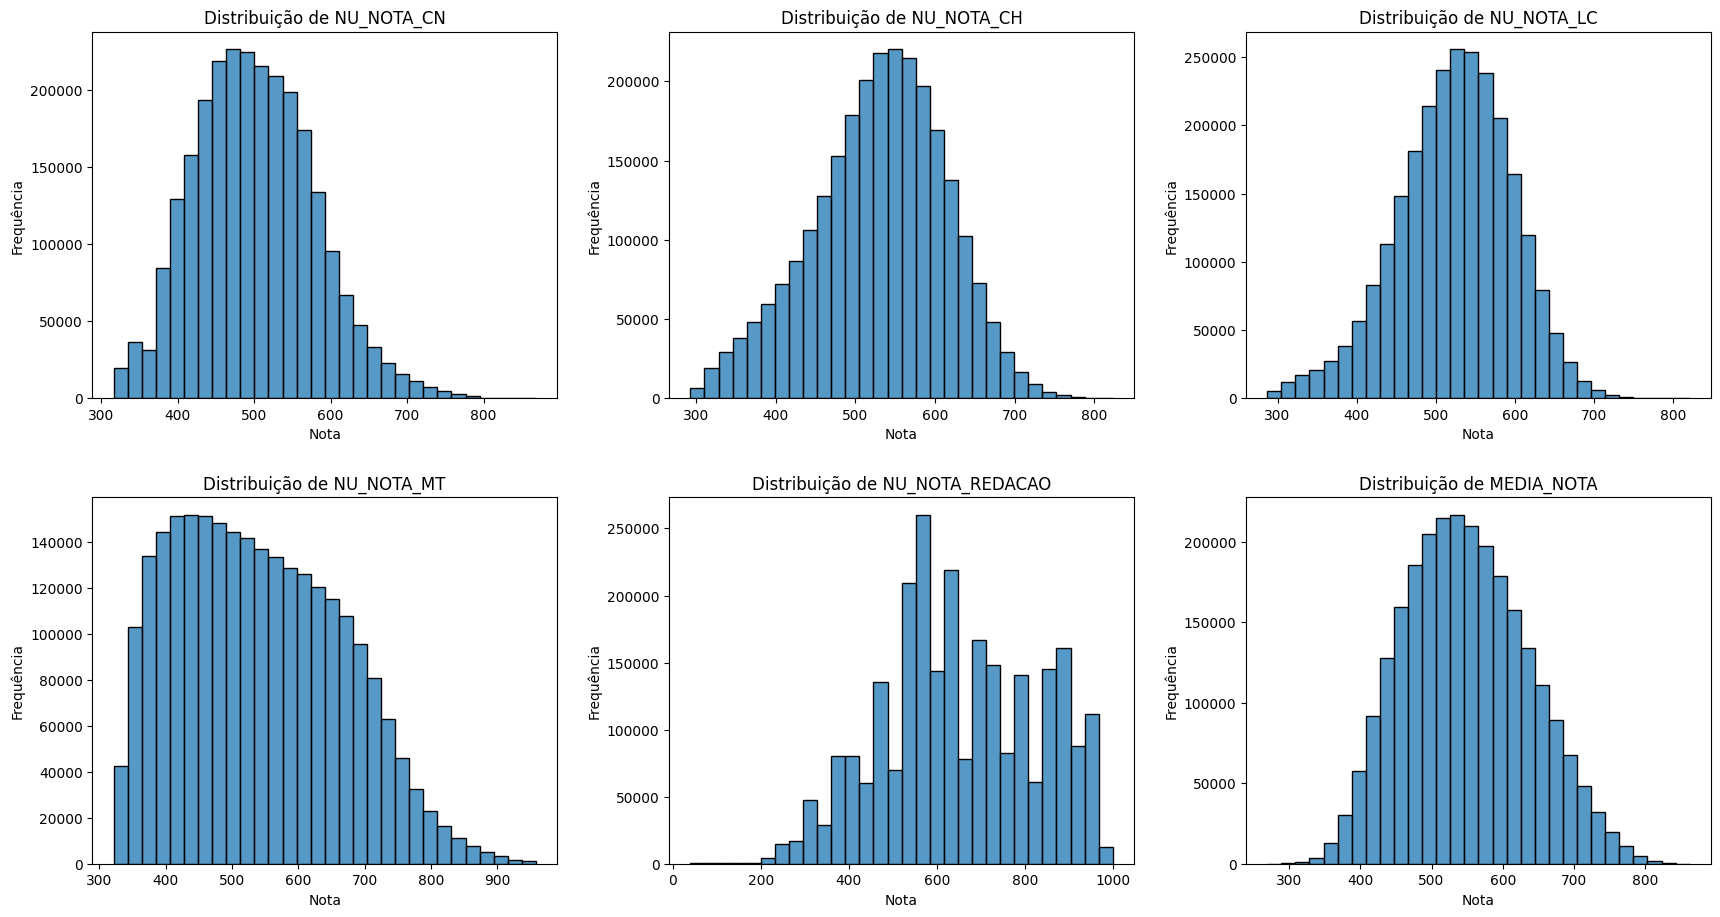

In [185]:
notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "MEDIA_NOTA"]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=5.0)

for col, ax in zip(notas, axes.ravel()):
    sns.histplot(md_enem[col], bins=30, kde=False, ax=ax)
    ax.set_title(f"Distribuição de {col}")
    ax.set_xlabel("Nota")
    ax.set_ylabel("Frequência")

if len(notas) < len(axes.ravel()):
    fig.delaxes(axes[1, 2])

plt.show()


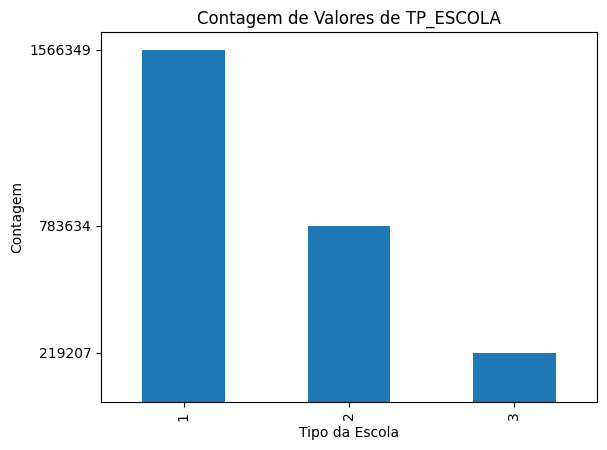

In [186]:
tp_escola = md_enem.TP_ESCOLA.value_counts()

tp_escola.plot(kind="bar")

plt.yticks(tp_escola, labels=tp_escola)

plt.xlabel("Tipo da Escola")
plt.ylabel("Contagem")
plt.title("Contagem de Valores de TP_ESCOLA")

plt.show()

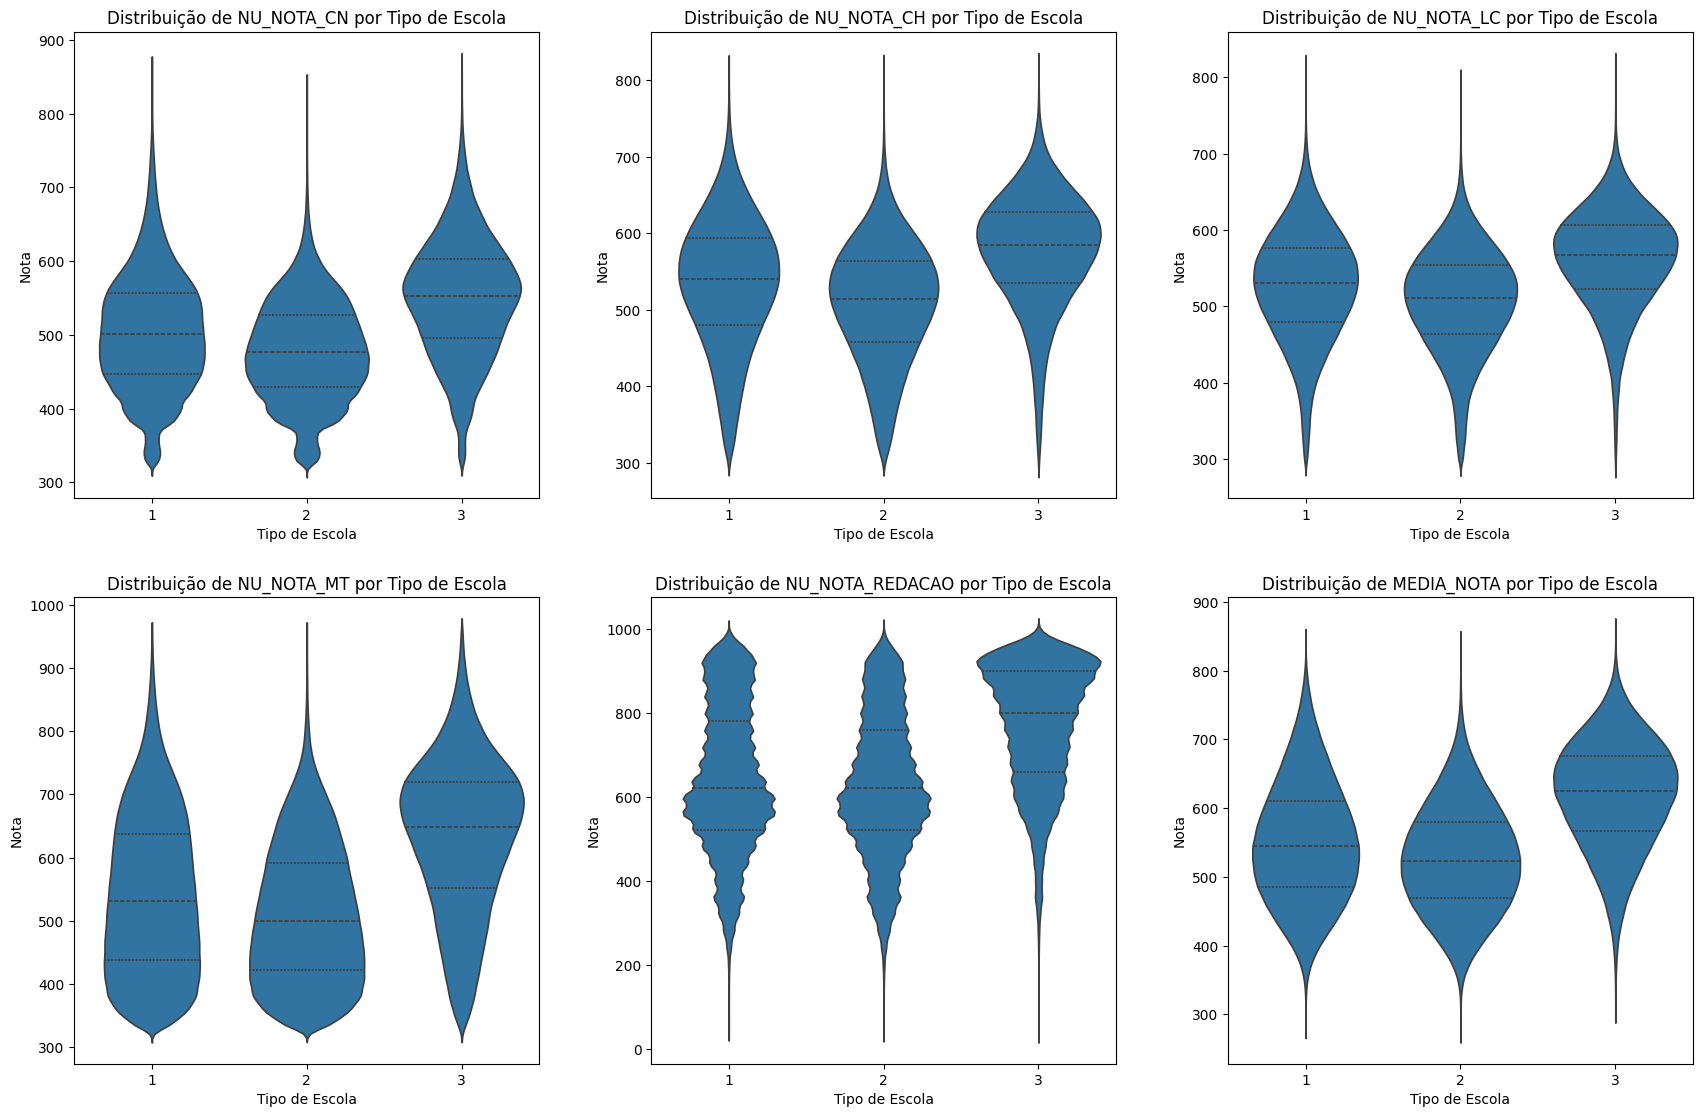

In [187]:
colunas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "MEDIA_NOTA"]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

fig.tight_layout(pad=5.0)

for col, ax in zip(colunas, axes.ravel()):
    sns.violinplot(x="TP_ESCOLA", y=col, data=md_enem, ax=ax, inner="quart")
    ax.set_title(f"Distribuição de {col} por Tipo de Escola", fontsize=12)
    ax.set_xlabel("Tipo de Escola", fontsize=10)
    ax.set_ylabel("Nota", fontsize=10)

if len(colunas) < len(axes.ravel()):
    fig.delaxes(axes[1, 2])

plt.show()


In [188]:
df_anova_1 = md_enem[["Q006", "MEDIA_NOTA"]].dropna()

In [189]:
# Separar os grupos por faixa de renda
grupo_A = df_anova_1[df_anova_1["Q006"] == "A"]["MEDIA_NOTA"]
grupo_B = df_anova_1[df_anova_1["Q006"] == "B"]["MEDIA_NOTA"]
grupo_C = df_anova_1[df_anova_1["Q006"] == "C"]["MEDIA_NOTA"]
grupo_D = df_anova_1[df_anova_1["Q006"] == "D"]["MEDIA_NOTA"]
grupo_E = df_anova_1[df_anova_1["Q006"] == "E"]["MEDIA_NOTA"]
grupo_F = df_anova_1[df_anova_1["Q006"] == "F"]["MEDIA_NOTA"]
grupo_G = df_anova_1[df_anova_1["Q006"] == "G"]["MEDIA_NOTA"]
grupo_H = df_anova_1[df_anova_1["Q006"] == "H"]["MEDIA_NOTA"]
grupo_I = df_anova_1[df_anova_1["Q006"] == "I"]["MEDIA_NOTA"]
grupo_J = df_anova_1[df_anova_1["Q006"] == "J"]["MEDIA_NOTA"]
grupo_K = df_anova_1[df_anova_1["Q006"] == "K"]["MEDIA_NOTA"]
grupo_L = df_anova_1[df_anova_1["Q006"] == "L"]["MEDIA_NOTA"]
grupo_M = df_anova_1[df_anova_1["Q006"] == "M"]["MEDIA_NOTA"]
grupo_N = df_anova_1[df_anova_1["Q006"] == "N"]["MEDIA_NOTA"]
grupo_O = df_anova_1[df_anova_1["Q006"] == "O"]["MEDIA_NOTA"]
grupo_P = df_anova_1[df_anova_1["Q006"] == "P"]["MEDIA_NOTA"]
grupo_Q = df_anova_1[df_anova_1["Q006"] == "Q"]["MEDIA_NOTA"]

# Realizar o ANOVA
f_stat, p_value = f_oneway(
    grupo_A, grupo_B, grupo_C, grupo_D, grupo_E, grupo_F,
    grupo_G, grupo_H, grupo_I, grupo_J, grupo_K, grupo_L,
    grupo_M, grupo_N, grupo_O, grupo_P, grupo_Q
)

# Exibir os resultados
print(f"F-Estatística: {f_stat}")
print(f"Valor-p: {p_value}")

# Interpretação
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há diferenças significativas entre as médias das notas para as diferentes faixas de renda.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferenças significativas entre as médias das notas para as diferentes faixas de renda.")


F-Estatística: 47579.41138697742
Valor-p: 0.0
Rejeitamos a hipótese nula: Há diferenças significativas entre as médias das notas para as diferentes faixas de renda.


In [190]:
modelo = ols("MEDIA_NOTA ~ C(Q006)", data=df_anova_1).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

print(anova_table)

                    sum_sq           df         F  PR(>F)
C(Q006)   4,483,667,652.23        16.00 47,579.41    0.00
Residual 15,131,699,743.24 2,569,173.00       NaN     NaN


- F-Estatística = 47,579.41:
    - A estatística F é extremamente alta, indicando que a variação entre as médias das diferentes faixas de renda é muito maior que a variação dentro dos grupos (entre os indivíduos de cada faixa de renda).

- Valor-p = 0.00:
    - O valor-p é menor que o nível de significância padrão (P < 0.05), o que significa que rejeitamos a hipótese nula.

- Conclusão: Há diferenças significativas nas médias das notas do ENEM entre as faixas de renda.

A soma dos quadrados da renda (C(Q006)) é 4,483,667,652.23, enquanto a soma dos quadrados residual é 15,131,699,743.24.
- A proporção da variância explicada pela renda é:
    - Proporção = ( Sum Sq de Q006 / Soma total dos Quadrados ) ~= 23%

Cerca de 23% da variação nas médias do ENEM pode ser explicada pelas diferenças nas faixas de renda, enquanto o restante (77%) é explicado por outros fatores não incluídos no modelo (como tipo de escola, qualidade do ensino, dedicação do aluno, etc.).


### Teste de Tukey
O teste de Tukey HSD (Honest Significant Difference, ou Diferença Honesta Significativa) é um teste estatístico utilizado para identificar quais pares de médias diferem significativamente entre si, após a realização de um ANOVA.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B  18.6575    0.0  17.8928  19.4222   True
     A      C  42.1144    0.0  41.2983  42.9306   True
     A      D  56.5823    0.0  55.7246  57.4401   True
     A      E  69.4723    0.0  68.5583  70.3864   True
     A      F   81.201    0.0  80.1723  82.2298   True
     A      G  92.8494    0.0  91.9293  93.7695   True
     A      H 104.9742    0.0 103.9062 106.0423   True
     A      I 113.0745    0.0 111.8403 114.3087   True
     A      J 120.8088    0.0 119.5234 122.0942   True
     A      K 125.7519    0.0 124.3581 127.1458   True
     A      L  130.481    0.0 128.8463 132.1158   True
     A      M 137.3481    0.0 135.6058 139.0904   True
     A      N 139.9801    0.0 138.3831 141.5772   True
     A      O 145.1989    0.0 143.5984 146.7993   True
     A      P 152.8076    0.0  151.156 154.4593   True
     A    

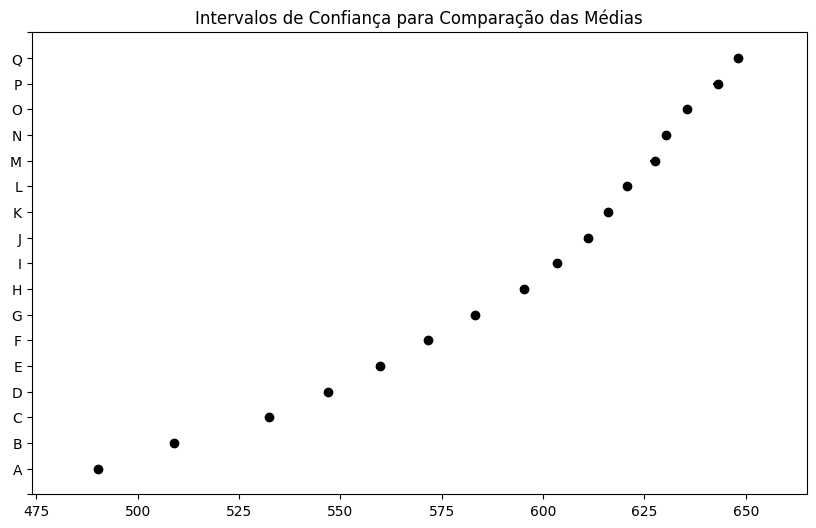

In [191]:
# Aplicar o teste de Tukey
tukey = pairwise_tukeyhsd(df_anova_1["MEDIA_NOTA"], df_anova_1["Q006"], alpha=0.05)

# Exibir os resultados
print(tukey)

# Visualizar os intervalos de confiança
tukey.plot_simultaneous()
plt.title("Intervalos de Confiança para Comparação das Médias")
plt.show()


## Conclusão

O ANOVA demonstrou que a renda familiar influencia significativamente as notas no ENEM, refletindo desigualdades socioeconômicas que impactam diretamente o desempenho acadêmico. No entanto, a análise também sugere que outros fatores contribuem substancialmente para a variabilidade nas notas, apontando para a complexidade das desigualdades educacionais no Brasil.